In [9]:
import wandb
from math import isnan 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import wandb
NUM_LAYERS = 11
api = wandb.Api()
projects= ["LayerSelection", "Blines"]
# Project is specified by <entity/project-name>
result_list = []
config_list = []
for project in projects:
  runs = api.runs(f"alelab/{project}")
  for run in runs: 
    try:
        config = {"project": project}
        config["bit_width_list"] = list(map(int, run.config["bit_width_list"].split(',')))
        config["bit_width"] = config["bit_width_list"][0]
        name = run.name
        if "HIGH" in name:
            config["algorithm"] = "OURS(high)"
        if "LOW" in name:
            config["algorithm"] = "OURS(low)"
        elif "vanilla" in name:
            config["algorithm"] = "Vanilla QAT"
        elif "anyprec" in name:
            config["algorithm"] = "Anyprecision"
        config["seed"] = run.config["seed"]
        for l in range(NUM_LAYERS):
            for split in ["train", "test"]:
                if project=="Blines":
                    slack_key = f'{split}_l2_layer_{l}_bw_{config["bit_width"]}'   
                else:
                    slack_key = f'slack_layer_{l}_bw_{config["bit_width"]}_{split}'
                    dual_key = f'dual_layer_{l}_bw_{config["bit_width"]}'
                result_dict = {"slack": run.summary[slack_key], "layer": l, "split":split}
                if project!="Blines":
                    result_dict["dual"] = run.summary[dual_key]
                result_list.append(result_dict)
                config_list.append(config)
    except:
        print(run.id)
config_df = pd.DataFrame.from_records(config_list) 
result_df = pd.DataFrame.from_records(result_list) 
all_df = pd.concat([config_df,result_df], axis=1)

37qlnvu3
13ot01wp
wlcsr9jv
2mgoxrf4
1ec6lfur
3vr7mr71


In [3]:
all_df.columns

Index(['bit_width_list', 'bit_width', 'algorithm', 'seed', 'slack', 'layer'], dtype='object')

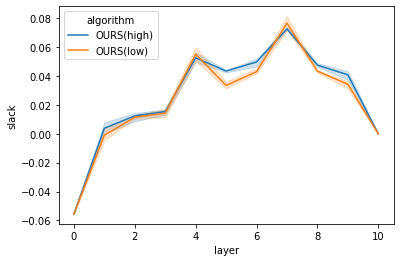

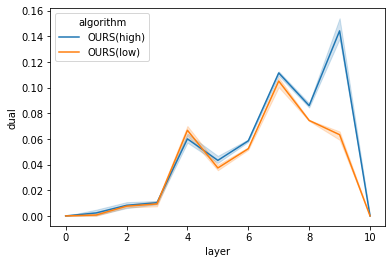

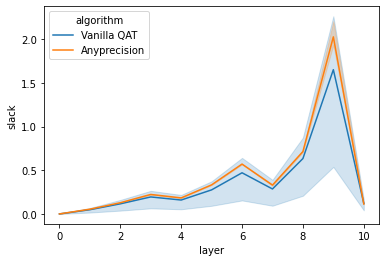

In [17]:
for project in projects:
    for split in ["train"]:
        for bw in [2,]:
            query_df = all_df.query(f'bit_width=={bw} and split=="{split}" and project=="{project}"')
            sns.lineplot(x ="layer", y="slack", hue="algorithm", data=query_df)
            plt.show()
            if project=="LayerSelection":
                sns.lineplot(x ="layer", y="dual", hue="algorithm", data=query_df)
                plt.show()

In [26]:
split="train"
bw=2
for seed in [0, 1, 2]:
    print(seed)
    query_df = all_df.query(f'bit_width=={bw} and split=="{split}" and project=="Blines"')
    print(query_df.sort_values("slack", ascending=False).drop_duplicates("layer")["layer"])

0
644     9
642     8
572     6
640     7
570     5
566     3
568     4
580    10
564     2
562     1
560     0
Name: layer, dtype: int64
1
644     9
642     8
572     6
640     7
570     5
566     3
568     4
580    10
564     2
562     1
560     0
Name: layer, dtype: int64
2
644     9
642     8
572     6
640     7
570     5
566     3
568     4
580    10
564     2
562     1
560     0
Name: layer, dtype: int64


In [27]:
split="train"
bw=2
for algorithm in ["OURS(high)", "OURS(low)"]:
    print(algorithm)
    for seed in [0, 1, 2]:
        print(seed)
        query_df = all_df.query(f'bit_width=={bw} and split=="{split}" and project=="LayerSelection" and algorithm=="{algorithm}"')
        print(query_df.sort_values("dual", ascending=False).drop_duplicates("layer")["layer"])

OURS(high)
0
380     9
244     7
246     8
238     4
374     6
240     5
368     3
234     2
364     1
142     0
250    10
Name: layer, dtype: int64
1
380     9
244     7
246     8
238     4
374     6
240     5
368     3
234     2
364     1
142     0
250    10
Name: layer, dtype: int64
2
380     9
244     7
246     8
238     4
374     6
240     5
368     3
234     2
364     1
142     0
250    10
Name: layer, dtype: int64
OURS(low)
0
266     7
334     8
194     4
336     9
330     6
196     5
324     3
322     2
188     1
186     0
272    10
Name: layer, dtype: int64
1
266     7
334     8
194     4
336     9
330     6
196     5
324     3
322     2
188     1
186     0
272    10
Name: layer, dtype: int64
2
266     7
334     8
194     4
336     9
330     6
196     5
324     3
322     2
188     1
186     0
272    10
Name: layer, dtype: int64
